# Sinusoidal parameters estimation in white gaussian noise
## Monte-Carlo performance simulation

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from pyestimate import sin_param_estimate

import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

N_trial = 10000
snr_dB_list = np.linspace(0, 10, 5)
N_list = [20, 100]

A_est = np.zeros((len(snr_dB_list), len(N_list), N_trial))
phi_est = np.zeros(A_est.shape)
f_est = np.zeros(A_est.shape)

A = 1.23456789
f = 0.123456789
phi = np.pi/9.87654321

N_total = N_trial * len(N_list) * len(snr_dB_list)
for isnr, snr_dB in enumerate(snr_dB_list):
    snr = 10**(snr_dB/10)
    sigma2 = A**2/(2*snr)
    for i_n, N in enumerate(N_list):
        n = np.arange(N)
        s = A * np.cos(2*np.pi*f*n+phi)
        w = np.random.normal(scale=np.sqrt(sigma2), size=(N, N_trial))
        for it in range(N_trial):
            print(f'Processing {it + N_trial * i_n + N_trial * len(N_list) * isnr + 1}/{N_total}', end='\r')
            x = s + w[:,it]
            A_hat, f_hat, phi_hat = sin_param_estimate(x, nfft=16384) # parameters estimation
            A_est[isnr,i_n,it] = A_hat
            f_est[isnr,i_n,it] = f_hat
            phi_est[isnr,i_n,it] = phi_hat

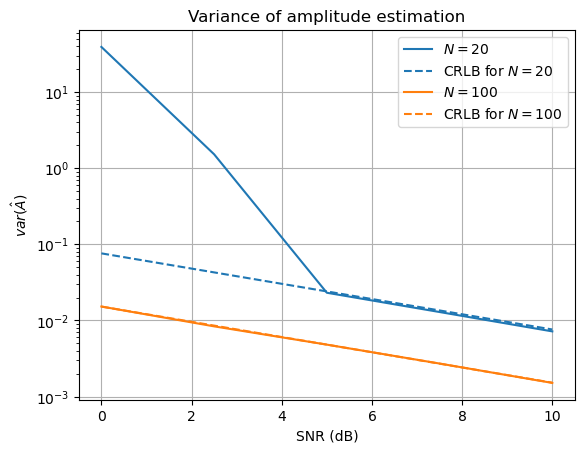

In [3]:
snr_list = 10**(snr_dB_list/10)
sigma2_list = A**2/(2*snr_list)

plt.figure()
for i_n, N in enumerate(N_list):
    plt.semilogy(snr_dB_list, np.var(A_est[:,i_n,:], axis=1), label=f'$N={N}$')
    plt.semilogy(snr_dB_list, 2*sigma2_list/N, '--', color=plt.gca().lines[-1].get_color(), label=f'CRLB for $N={N}$')

plt.grid()
plt.xlabel('SNR (dB)')
plt.ylabel('$var(\hat{A})$')
plt.legend()
plt.title('Variance of amplitude estimation')
plt.show()


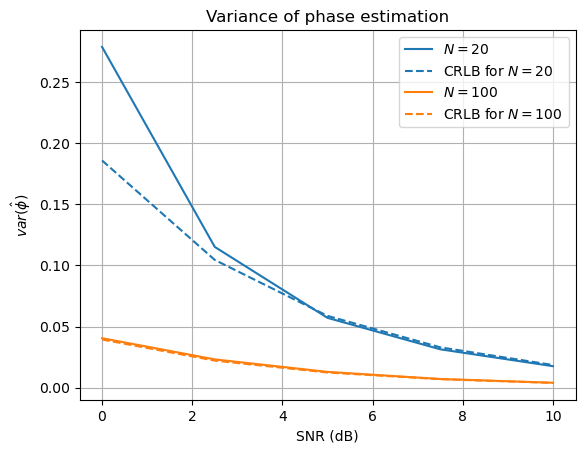

In [4]:
plt.figure()
for i_n, N in enumerate(N_list):
    plt.plot(snr_dB_list, np.var(phi_est[:,i_n,:], axis=1), label=f'$N={N}$')
    plt.plot(snr_dB_list, 2*(2*N-1)/(snr_list*N*(N+1)), '--', color=plt.gca().lines[-1].get_color(), label=f'CRLB for $N={N}$')

plt.grid()
plt.xlabel('SNR (dB)')
plt.ylabel('$var(\hat{\phi})$')
plt.legend()
plt.title('Variance of phase estimation')
plt.show()

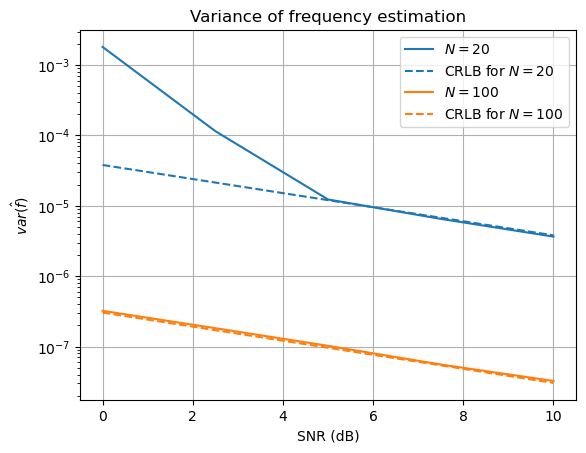

In [5]:
plt.figure()
for i_n, N in enumerate(N_list):
    plt.semilogy(snr_dB_list, np.var(f_est[:,i_n,:], axis=1), label=f'$N={N}$')
    plt.semilogy(snr_dB_list, 12/((2*np.pi)**2 * snr_list * N * (N**2-1)), '--', color=plt.gca().lines[-1].get_color(), label=f'CRLB for $N={N}$')

plt.grid()
plt.xlabel('SNR (dB)')
plt.ylabel('$var(\hat{f})$')
plt.legend()
plt.title('Variance of frequency estimation')
plt.show()